In [62]:
import tensorflow as tf
import numpy as np

np.random.seed(1234)

# New session
T = tf.float32
session = tf.get_default_session()
if session is None:
    session = tf.InteractiveSession()

time = np.linspace(0, 1, 28)
y = np.random.randn(28)
X = np.random.randn(28, 300)
y = tf.constant(y, dtype=T)
X = tf.constant(X, dtype=T)

w0 = np.random.randn(300)
w = tf.Variable(w0, dtype=T)

nlc1 = 100
nlc2 = 100
npol = 100
idx_lc1 = slice(0, 100)
idx_lc2 = slice(100, 200)
idx_pol = slice(200, 300)
lam_lc1 = tf.constant(0.5 * 1e-33, dtype=T)
lam_lc2 = tf.constant(1e-33, dtype=T)
lam_pol = tf.constant(1.5e-33, dtype=T)

# Zé's iterative L2 method
XTX = tf.matmul(X, X, transpose_a=True)
XTy = tf.matmul(X, y[:, None], transpose_a=True)
bk1 = tf.reduce_sum(tf.abs(w[idx_lc1]))
bk2 = tf.reduce_sum(tf.abs(w[idx_lc2]))
wk_ze = tf.squeeze(tf.linalg.solve(XTX + tf.diag(tf.concat((lam_lc1 / bk1 + tf.zeros(nlc1, dtype=T),
                                                         lam_lc2 / bk2 + tf.zeros(nlc2, dtype=T),
                                                         lam_pol + tf.zeros(npol, dtype=T)), 0)), XTy))

# Woodbury version
bk1 = tf.reduce_sum(tf.abs(w[idx_lc1]))
bk2 = tf.reduce_sum(tf.abs(w[idx_lc2]))
XXT1 = tf.matmul(X[:, idx_lc1], X[:, idx_lc1], transpose_b=True)
XXT2 = tf.matmul(X[:, idx_lc2], X[:, idx_lc2], transpose_b=True)
XXT3 = tf.matmul(X[:, idx_pol], X[:, idx_pol], transpose_b=True)
L = tf.concat((bk1 / lam_lc1 + tf.zeros(nlc1, dtype=T),
               bk2 / lam_lc2 + tf.zeros(nlc2, dtype=T),
               1 / lam_pol   + tf.zeros(npol, dtype=T)), 0)
M1 = L[:, None] * tf.transpose(X)
M2 = tf.linalg.solve(bk1 / lam_lc1 * XXT1 + 
                     bk2 / lam_lc2 * XXT2 + 
                     1 / lam_pol * XXT3 + tf.eye(len(time)), 
                     tf.reshape(y, [-1, 1]))
wk_rod = tf.squeeze(tf.matmul(M1, M2))

opt_ze = tf.assign(w, wk_ze)
opt_rod = tf.assign(w, wk_rod)

# Initialize the session
init = tf.global_variables_initializer()
session.run(init)

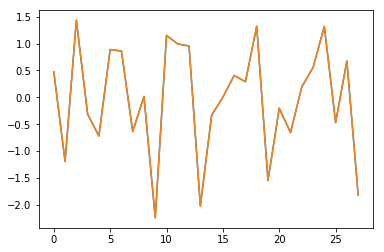

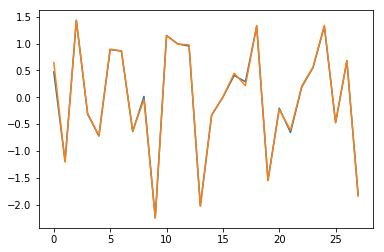

In [63]:
import matplotlib.pyplot as pl
%matplotlib inline
session.run(init)
session.run(opt_ze)
pl.plot(y.eval())
pl.plot(np.dot(X.eval(), w.eval()))

session.run(init)
session.run(opt_rod)
fig = pl.figure()
pl.plot(y.eval())
pl.plot(np.dot(X.eval(), w.eval()))

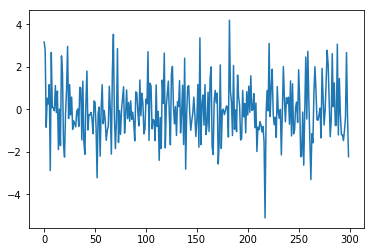

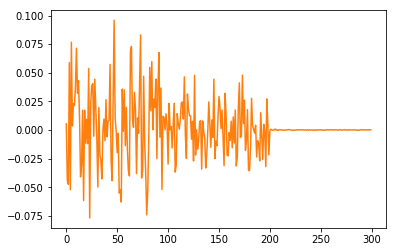

In [42]:
import matplotlib.pyplot as pl
%matplotlib inline
session.run(init)
session.run(opt_ze)
pl.plot(w.eval())
session.run(init)
session.run(opt_rod)
fig = pl.figure()
pl.plot(w.eval(), color='C1')